In [1]:
import pandas as pd
df = pd.read_csv(
    r"C:\Users\user\Desktop\Phishing_email\data\merged_dataset.csv"
)


In [2]:
# Remove rows where text is missing
df = df.dropna(subset=['text'])

# Convert to string safely
df['text'] = df['text'].astype(str)


In [3]:
df['text'] = df['text'].str.strip()


In [4]:
# Remove nulls
df.dropna(inplace=True)

df['final_label'] = df['final_label'].astype(int)

# Lowercasing only
def clean_text(text):
    return text.lower()

df['text'] = df['text'].apply(clean_text)

In [5]:
print(df.info())

<class 'pandas.DataFrame'>
Index: 3998 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   text         3998 non-null   str  
 1   final_label  3998 non-null   int64
dtypes: int64(1), str(1)
memory usage: 93.7 KB
None


In [6]:
df.shape

(3998, 2)

In [7]:
df.tail()

,text,final_label
3995,"hi olivia, i hope this email finds you in good...",2
3996,"dear michael, i hope this email finds you well...",2
3997,"hi jessica, i hope this email finds you in goo...",2
3998,"dear benjamin, i hope this email finds you wel...",2
3999,"hi samantha, i hope this email finds you in go...",2


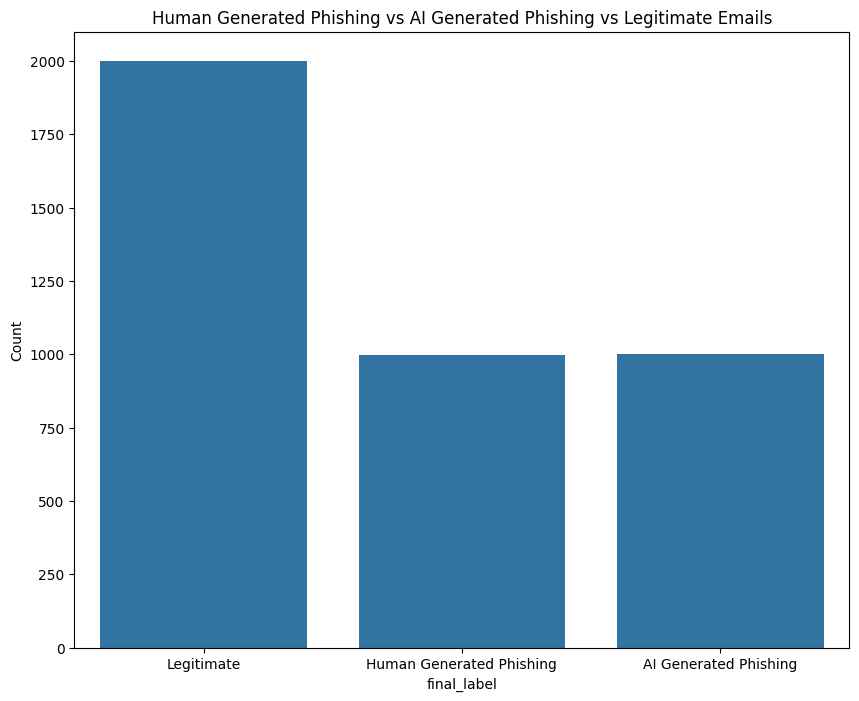

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.countplot(data=df, x='final_label', order=[0,1,2])

plt.title('Human Generated Phishing vs AI Generated Phishing vs Legitimate Emails')

plt.xticks([0, 1, 2], 
           ['Legitimate', 
            'Human Generated Phishing', 
            'AI Generated Phishing'])

plt.ylabel('Count')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_18508\2051095916.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


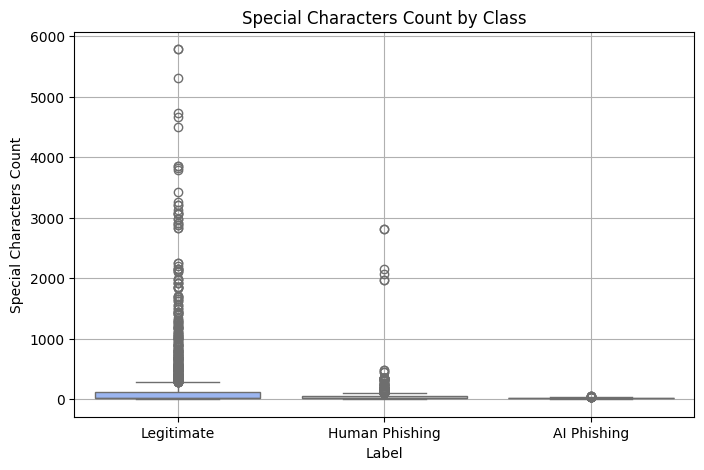

In [9]:
df['special_chars'] = df['text'].apply(
    lambda x: sum(not c.isalnum() and not c.isspace() for c in x)
)

plt.figure(figsize=(8,5))

sns.boxplot(
    x='final_label',   # change if needed
    y='special_chars',
    data=df,
    palette='coolwarm'
)

plt.xticks(
    [0, 1, 2],
    ['Legitimate', 'Human Phishing', 'AI Phishing']
)


plt.title('Special Characters Count by Class')
plt.xlabel('Label')
plt.ylabel('Special Characters Count')

plt.grid(True)
plt.show()


In [10]:
print(df.columns)


Index(['text', 'final_label', 'special_chars'], dtype='str')


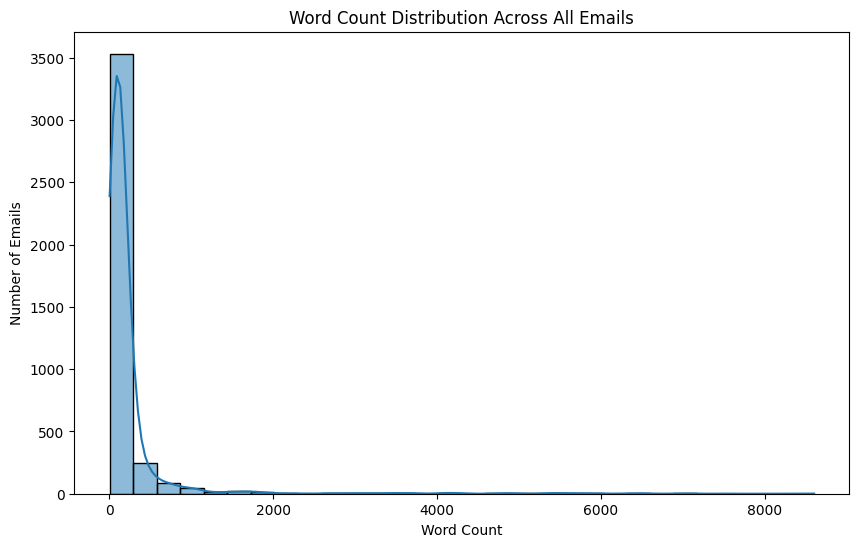

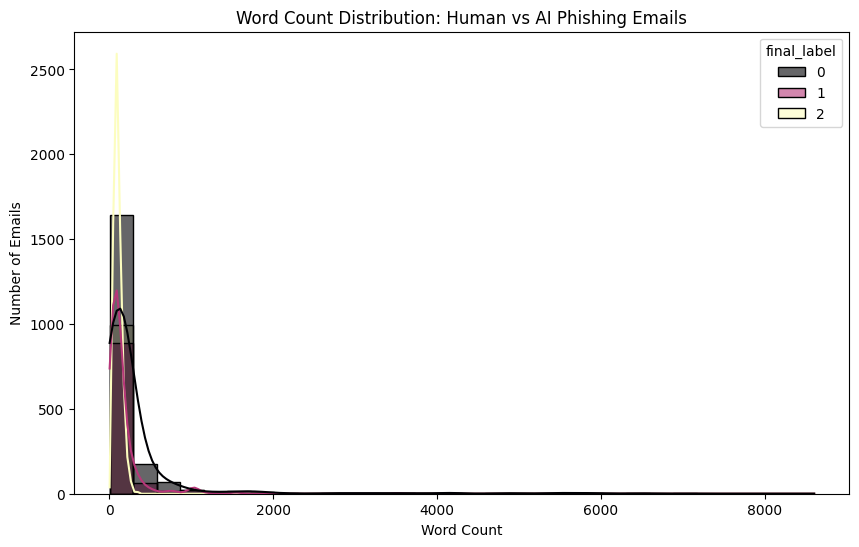

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))

sns.histplot(
    df['word_count'],
    bins=30,
    kde=True
)

plt.title('Word Count Distribution Across All Emails')
plt.xlabel('Word Count')
plt.ylabel('Number of Emails')

plt.show()
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='word_count',
    hue='final_label',
    bins=30,
    kde=True,
    palette='magma',
    alpha=0.6
)

plt.title('Word Count Distribution: Human vs AI Phishing Emails')
plt.xlabel('Word Count')
plt.ylabel('Number of Emails')

plt.show()


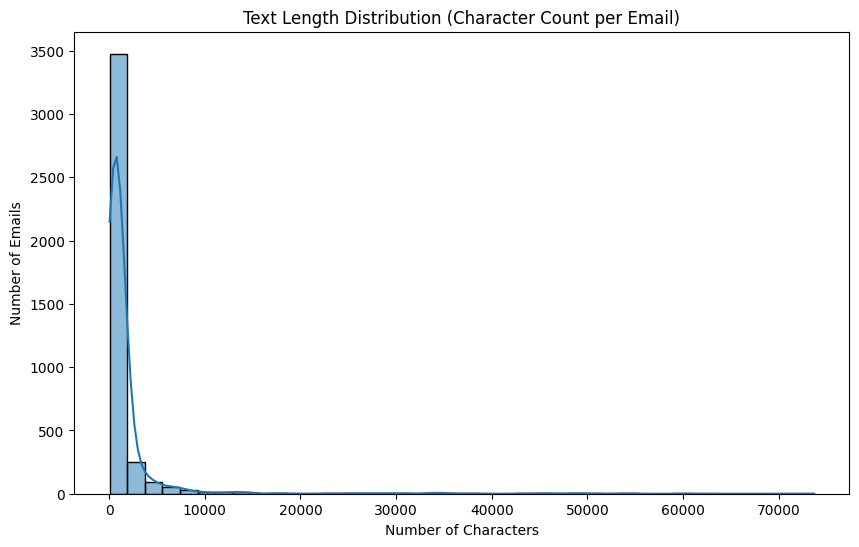

C:\Users\user\AppData\Local\Temp\ipykernel_18508\4104215258.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


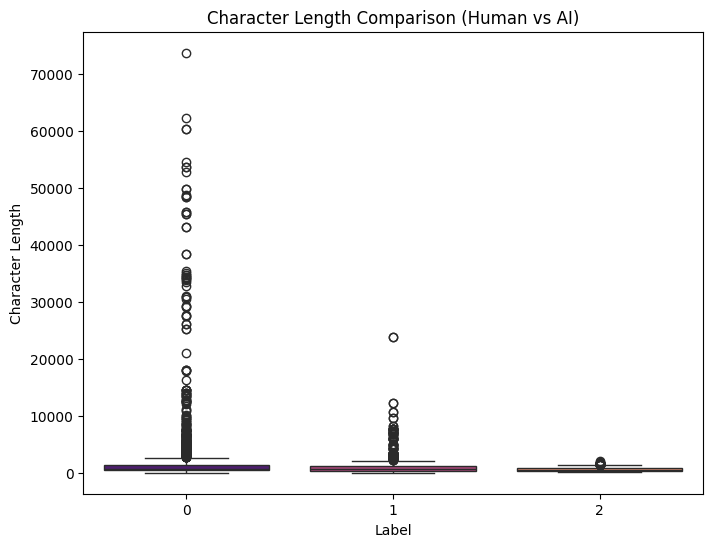

In [12]:
df['char_length'] = df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,6))

sns.histplot(
    df['char_length'],
    bins=40,
    kde=True
)

plt.title('Text Length Distribution (Character Count per Email)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Emails')

plt.show()

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='final_label',
    y='char_length',
    palette='magma'
)

plt.title('Character Length Comparison (Human vs AI)')
plt.xlabel('Label')
plt.ylabel('Character Length')

plt.show()




In [13]:
print("Max length email:", df['char_length'].max())
print("Min length email:", df['char_length'].min())

print("\nTop 5 Longest Emails:")
print(df.sort_values(by='char_length', ascending=False).head())


Max length email: 73689
Min length email: 62

Top 5 Longest Emails:
                                                  text  final_label  \
174  [clamav-virusdb] update (daily: 5762) clamav d...            0   
173  [clamav-virusdb] update (daily: 5764) clamav d...            0   
226  [clamav-virusdb] update (daily: 5745) clamav d...            0   
227  [clamav-virusdb] update (daily: 5745) clamav d...            0   
200  [clamav-virusdb] update (daily: 5760) clamav d...            0   

     special_chars  word_count  char_length  
174           4672        8605        73689  
173           3794        7470        62329  
226           3863        7020        60253  
227           3863        7020        60253  
200           3427        6446        54501  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\user\AppData\Local\Temp\ipykernel_18508\1639969850.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


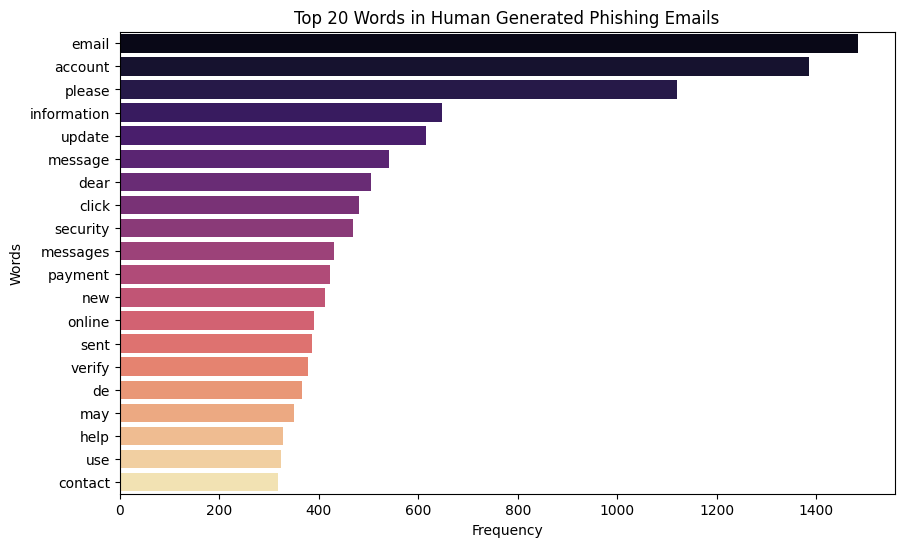

In [14]:

from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords (run once)
nltk.download('stopwords')

# ==============================
# ENSURE COLUMN NAME IS CORRECT
# ==============================
# If your column was final_label earlier
df.rename(columns={'final_label': 'label'}, inplace=True)

# ==============================
# DEFINE STOPWORDS
# ==============================
stop_words = set(stopwords.words('english'))

# ==============================
# SELECT  HUMAN GENERATED PHISHING EMAILS (label = 1)
# ==============================
phishing_text = ' '.join(
    df[df['label'] == 1]['text']
).lower()

# Split into words
phishing_words = phishing_text.split()

# ==============================
# FILTER WORDS
# ==============================
filtered_words = [
    word for word in phishing_words
    if word.isalpha() and word not in stop_words
]

# ==============================
# GET TOP 20 MOST COMMON WORDS
# ==============================
word_freq = Counter(filtered_words).most_common(20)

# Separate words and counts
words, counts = zip(*word_freq)

# ==============================
# PLOT BAR GRAPH
# ==============================
plt.figure(figsize=(10,6))

sns.barplot(
    x=list(counts),
    y=list(words),
    palette='magma'
)

plt.title('Top 20 Words in Human Generated Phishing Emails')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18508\2053036544.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


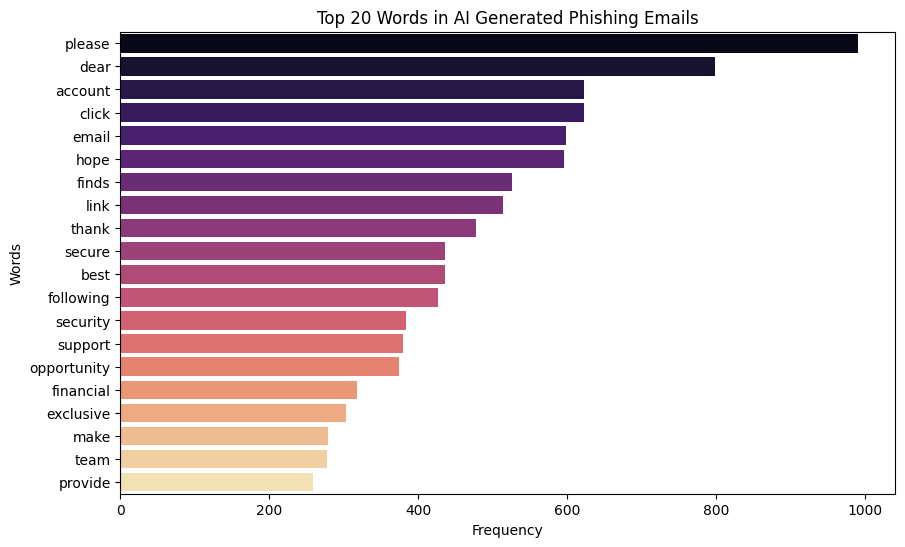

In [15]:
# ==============================
# SELECT AI GENERATED PHISHING EMAILS (label = 2)
# ==============================
ai_phishing_text = ' '.join(
    df[df['label'] == 2]['text']
).lower()

# Split into words
ai_phishing_words = ai_phishing_text.split()

# ==============================
# FILTER WORDS
# ==============================
filtered_words_ai = [
    word for word in ai_phishing_words
    if word.isalpha() and word not in stop_words
]

# ==============================
# GET TOP 20 MOST COMMON WORDS
# ==============================
word_freq_ai = Counter(filtered_words_ai).most_common(20)

# Separate words and counts
words_ai, counts_ai = zip(*word_freq_ai)

# ==============================
# PLOT BAR GRAPH
# ==============================
plt.figure(figsize=(10,6))

sns.barplot(
    x=list(counts_ai),
    y=list(words_ai),
    palette='magma'
)

plt.title('Top 20 Words in AI Generated Phishing Emails')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.show()

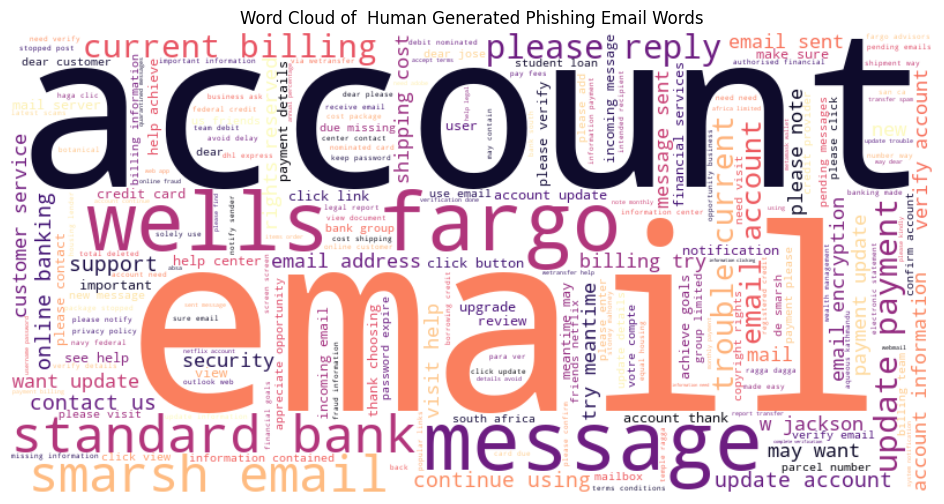

In [16]:
from wordcloud import WordCloud

# Join all filtered phishing words into a single string
wordcloud_text = ' '.join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(wordcloud_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of  Human Generated Phishing Email Words')
plt.show()

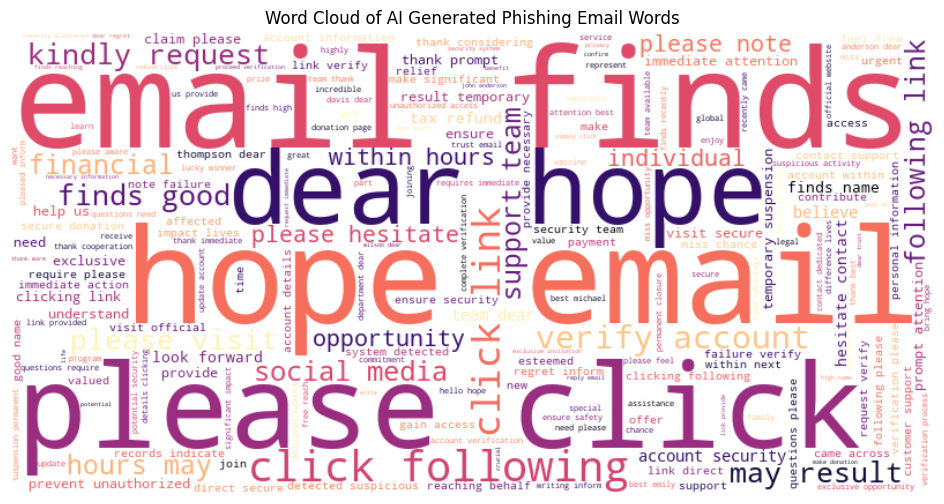

In [17]:
# Join all filtered ai phishing words into a single string
wordcloud_text_ai = ' '.join(filtered_words_ai)

# Generate word cloud
wordcloud_ai = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='magma'
).generate(wordcloud_text_ai)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_ai, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud of AI Generated Phishing Email Words')
plt.show()


In [18]:
%pip install torch 
import torch
print(torch.__version__)

Note: you may need to restart the kernel to use updated packages.
2.10.0+cpu


In [19]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [21]:
import re
import torch
import pandas as pd
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)

c:\Users\user\Desktop\Phishing_email\email_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# ── 1. Split data ─────────────────────────────────────────────────────────────

train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(),
    test_size=0.2, random_state=42, stratify=df['label']
)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts, train_val_labels,
    test_size=0.125,  # 10% of total
    random_state=42, stratify=train_val_labels
)

total = len(df)
print("Train:", len(train_texts)/total)   # ~0.70
print("Val:",   len(val_texts)/total)     # ~0.10
print("Test:",  len(test_texts)/total)    # ~0.20

Train: 0.6998499249624812
Val: 0.10005002501250625
Test: 0.2001000500250125


In [23]:
# ── 2. Check label distribution ───────────────────────────────────────────────

print("\nOriginal dataset:")
print(df['label'].value_counts(normalize=True))

train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
print("\nTrain set:")
print(train_df['label'].value_counts(normalize=True))

val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
print("\nValidation set:")
print(val_df['label'].value_counts(normalize=True))

test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})
print("\nTest set:")
print(test_df['label'].value_counts(normalize=True))


Original dataset:
label
0    0.500250
2    0.250125
1    0.249625
Name: proportion, dtype: float64

Train set:
label
0    0.500357
2    0.250179
1    0.249464
Name: proportion, dtype: float64

Validation set:
label
0    0.50
2    0.25
1    0.25
Name: proportion, dtype: float64

Test set:
label
0    0.50
2    0.25
1    0.25
Name: proportion, dtype: float64


In [24]:
# ── 3. Tokenize ───────────────────────────────────────────────────────────────

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings   = tokenizer(val_texts,   truncation=True, padding=True, max_length=512)
test_encodings  = tokenizer(test_texts,  truncation=True, padding=True, max_length=512)


In [25]:
# ── 4. Dataset class ──────────────────────────────────────────────────────────

class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset   = EmailDataset(val_encodings,   val_labels)
test_dataset  = EmailDataset(test_encodings,  test_labels)

In [26]:
# ── 5. Model ──────────────────────────────────────────────────────────────────

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


Loading weights: 100%|██████████| 199/199 [00:00<00:00, 1604.09it/s, Materializing param=bert.pooler.dense.weight]                               
BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those p

In [27]:
# ── 6. Compute metrics ────────────────────────────────────────────────────────

def compute_metrics(pred):
    labels = pred.label_ids
    preds  = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy':  acc,
        'f1':        f1,
        'precision': precision,
        'recall':    recall
    }

In [28]:
!pip install "accelerate>=1.1.0" --upgrade

In [29]:
# ── 7. Training arguments ─────────────────────────────────────────────────────

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    optim="adamw_torch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    dataloader_pin_memory=False   
)

In [30]:
# ── 8. Weighted Trainer (handles class imbalance 2000/1000/1000) ──────────────

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels  = inputs.get("labels")
        outputs = model(**inputs)
        logits  = outputs.get("logits")
        # Label 0 has 2x more samples → give it half the weight
        weights = torch.tensor([0.5, 1.0, 1.0]).to(logits.device)
        loss_fn = nn.CrossEntropyLoss(weight=weights)
        loss    = loss_fn(logits, labels)
        return (loss, outputs) if return_outputs else loss

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    processing_class=tokenizer,
    compute_metrics=compute_metrics
)

In [31]:
# ── 9. Train ──────────────────────────────────────────────────────────────────

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.354883,0.044349,0.985000,0.984987,0.985048,0.985000
2,0.038002,0.019499,0.995000,0.994987,0.995050,0.995000
3,0.004387,0.004536,0.997500,0.997497,0.997512,0.997500
4,0.000991,0.012905,0.995000,0.995000,0.995025,0.995000
5,0.000730,0.012361,0.995000,0.995000,0.995025,0.995000


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
There were missing keys in the checkpoint model loaded: ['bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.output.LayerNorm.weight', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.2.attention.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.bias', 'bert.encoder.layer.2.output.LayerNorm.weight', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.3.attention.output.LayerNorm.weight', 'bert.encoder.layer.3.attention.output.LayerNorm.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer

TrainOutput(global_step=875, training_loss=0.07979847928455898, metrics={'train_runtime': 29863.4817, 'train_samples_per_second': 0.468, 'train_steps_per_second': 0.029, 'total_flos': 3680956714014720.0, 'train_loss': 0.07979847928455898, 'epoch': 5.0})

In [32]:
# ── 10. Evaluate on test set ──────────────────────────────────────────────────

results = trainer.evaluate(eval_dataset=test_dataset)
print("\nTest set results:", results)


Test set results: {'eval_loss': 0.008101954124867916, 'eval_accuracy': 0.9975, 'eval_f1': 0.9974999921874512, 'eval_precision': 0.9975062189054726, 'eval_recall': 0.9975, 'eval_runtime': 162.343, 'eval_samples_per_second': 4.928, 'eval_steps_per_second': 0.308, 'epoch': 5.0}


In [48]:
# Per-class breakdown (not just weighted average)
from sklearn.metrics import classification_report

preds = trainer.predict(test_dataset)
pred_labels = preds.predictions.argmax(-1)

print(classification_report(
    test_labels, 
    pred_labels, 
    target_names=["Legitimate", "Human Phishing", "AI Phishing"]
))

                precision    recall  f1-score   support

    Legitimate       1.00      1.00      1.00       400
Human Phishing       1.00      0.99      1.00       200
   AI Phishing       1.00      1.00      1.00       200

      accuracy                           1.00       800
     macro avg       1.00      1.00      1.00       800
  weighted avg       1.00      1.00      1.00       800



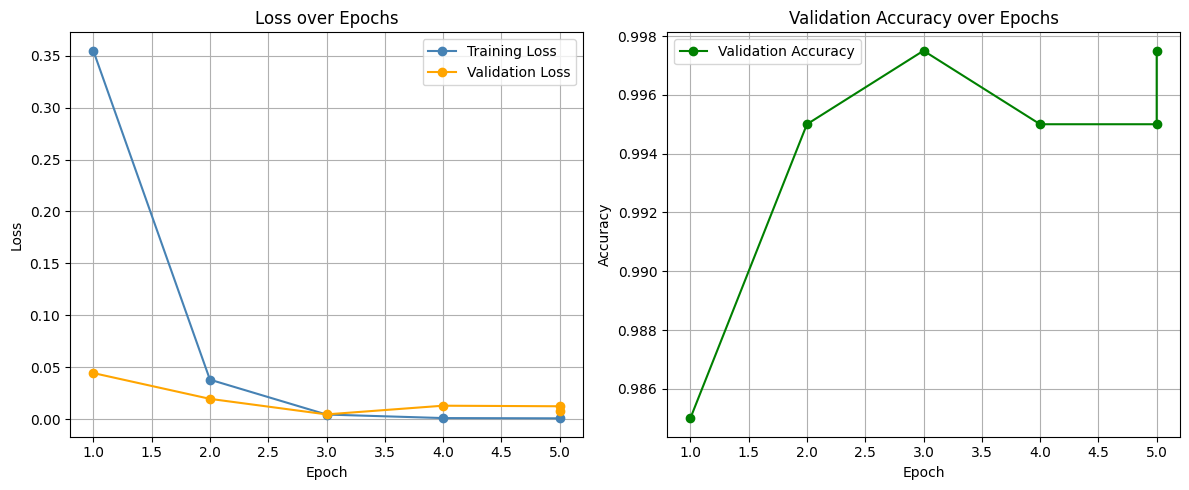

In [49]:

import matplotlib.pyplot as plt

log_history = trainer.state.log_history

train_entries = [e for e in log_history if 'loss' in e and 'eval_loss' not in e]
eval_entries  = [e for e in log_history if 'eval_loss' in e]

train_loss   = [e['loss'] for e in train_entries]
train_epochs = [e['epoch'] for e in train_entries]

eval_loss    = [e['eval_loss'] for e in eval_entries]
eval_acc     = [e['eval_accuracy'] for e in eval_entries]
eval_epochs  = [e['epoch'] for e in eval_entries]

plt.figure(figsize=(12, 5))

# -- Loss plot --
plt.subplot(1, 2, 1)
plt.plot(train_epochs, train_loss, marker='o', label='Training Loss', color='steelblue')
plt.plot(eval_epochs,  eval_loss,  marker='o', label='Validation Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)

# -- Accuracy plot --
plt.subplot(1, 2, 2)
plt.plot(eval_epochs, eval_acc, marker='o', color='green', label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [50]:
# ============================================================
#  SAVE THE FINAL MODEL & TOKENIZER
# ============================================================

model.save_pretrained("../model/final_model")
tokenizer.save_pretrained("../model/final_model")
print("Model and tokenizer saved to ./model/final_model")


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]


SafetensorError: Error while serializing: I/O error: The requested operation cannot be performed on a file with a user-mapped section open. (os error 1224)

In [38]:
# ============================================================
# RELOAD MODEL & TOKENIZER (optional verification)
# ============================================================

from transformers import BertForSequenceClassification, BertTokenizer

model     = BertForSequenceClassification.from_pretrained("../model/final_model")
tokenizer = BertTokenizer.from_pretrained("../model/final_model")
print("Model and tokenizer loaded successfully.")

Loading weights: 100%|██████████| 201/201 [00:00<00:00, 1243.53it/s, Materializing param=classifier.weight]                                     


Model and tokenizer loaded successfully.


In [39]:
# ============================================================
#  TOKENIZE TEST DATA
# ============================================================

test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors=None   # returns plain lists; EmailDataset handles tensor conversion
)

In [40]:

# ============================================================
#  CONVERT TO PYTORCH DATASET
# ============================================================

import torch

class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels    = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

test_dataset = EmailDataset(test_encodings, test_labels)
print(f"Test dataset size: {len(test_dataset)} samples")

Test dataset size: 800 samples


In [41]:
# ============================================================
# EVALUATE MODEL ON TEST SET
# ============================================================

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# -- Run predictions on the test set --
test_results = trainer.predict(test_dataset)

# -- Extract predicted class labels --
y_pred = test_results.predictions.argmax(axis=1)
y_true = test_labels  # list of integers: 0, 1, or 2

# -- Print core metrics (weighted average for 3-class problem) --
print("=" * 50)
print("       FINAL TEST EVALUATION METRICS")
print("=" * 50)
print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")
print()





       FINAL TEST EVALUATION METRICS
Accuracy  : 0.9975
Precision : 0.9975
Recall    : 0.9975
F1 Score  : 0.9975



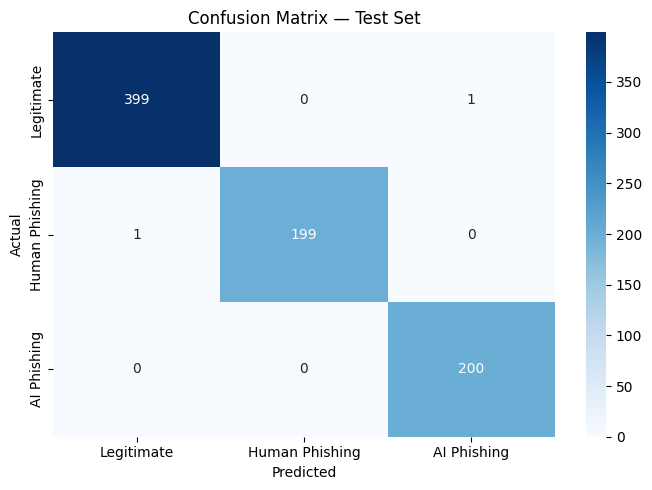

In [42]:
# -- Confusion matrix --
cm = confusion_matrix(y_true, y_pred)
labels = ["Legitimate", "Human Phishing", "AI Phishing"]

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Test Set")
plt.tight_layout()
plt.show()

In [43]:
# -- Full per-class classification report --
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=["Legitimate", "Human Phishing", "AI Phishing"]
))

Classification Report:
                precision    recall  f1-score   support

    Legitimate       1.00      1.00      1.00       400
Human Phishing       1.00      0.99      1.00       200
   AI Phishing       1.00      1.00      1.00       200

      accuracy                           1.00       800
     macro avg       1.00      1.00      1.00       800
  weighted avg       1.00      1.00      1.00       800

